In [25]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
import seaborn as sns
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")

## Matrix inverse

In [12]:
import time
class Timer(object):
    def __init__(self, name=None):
        self.name = name

    def __enter__(self):
        self.tstart = time.time()

    def __exit__(self, type, value, traceback):
        if self.name:
            print('[%s]' % self.name,)
        print('Elapsed: %s' % (time.time() - self.tstart))

In [17]:
with Timer('Inveting matrix'):
    X = np.random.random((1000, 1000))
    X_inv = np.linalg.inv(X)

[Inveting matrix]
Elapsed: 0.05183577537536621


In [ ]:
n = 1
result = {}
try:
    X = np.random.random((n*1000, n*1000))
    while True:
        t = time.time()
        X_inv = np.linalg.inv(X)
        elapsed = time.time() - t
        result[n*1000] = math.log10(elapsed)
        n += 1
except:
    print('exceeded')
    result

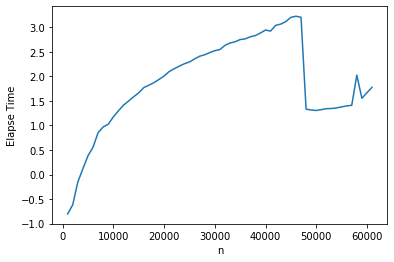

In [29]:
lists = sorted(result.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.xlabel('n')
plt.ylabel('Elapse Time');
plt.show()

## PCA

In [ ]:
iris = datasets.load_iris()

In [ ]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
data['species'] = data['target'].map({0.0: 'setosa', 1.0: 'versicolor', 2.0: 'virginica'})
#data = data.drop(['target'], axis = 1)

In [ ]:
num_cols = data.describe().columns.to_list()[:-1]
for col in num_cols:
    data[col] = (data[col] - data[col].mean()) / data[col].std()

### (2) Standardizing data

In [ ]:
data.head(3)

### (3) Computing p x p coveriance matrix

In [ ]:
df_cov = data[num_cols].cov()
df_cov

### (4) Eigenvalue decomposition of p x p covariance matrix

In [ ]:
D, Q = np.linalg.eig(df_cov.replace('n/a', 0).astype(float))

In [ ]:
idx = D.argsort()[::-1] 
D = D[idx]
Q = Q[:,idx]

#### Eigenvectors

In [ ]:
Q

#### Eigenvectors

In [ ]:
D

### (5) Obtain First principal component and visualise its contribution 

In [ ]:
D_first = D[0]
Q_first = Q[:,0]

In [ ]:
Q_first

In [ ]:
X = data[num_cols]
X_new = X*Q_first

In [ ]:
data['First_principal'] = X_new[num_cols].sum(axis=1)

In [ ]:
data['zeros'] = 0

In [ ]:
fig, ax= plt.subplots(figsize=(12, 6))
data.plot(kind = "scatter", 
            x='First_principal', 
            y = 'zeros', 
            c='target',
            cmap="viridis",
            marker = "o",
            ax=ax)

### (6) First and second principal components

In [ ]:
D_first = D[0]
Q_first = Q[:,0]

In [ ]:
D_second = D[1]
Q_second = Q[:,1]

In [ ]:
Q_first

In [ ]:
Q_second

In [ ]:
X = data[num_cols]
X_new = X*Q_second

In [ ]:
data['Second_principal'] = X_new[num_cols].sum(axis=1)

In [ ]:
fig, ax= plt.subplots(figsize=(12, 6))
data.plot(kind = "scatter", 
            x='First_principal', 
            y = 'Second_principal', 
            c='target',
            cmap="viridis",
            marker = "o",
            ax=ax)